## .merge()
- pandas.merge() : https://pandas.pydata.org/docs/reference/api/pandas.merge.html
- DataFrame.merge() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
- 일반적으로 pandas.merge(), pd.merge()가 쓰인다.


### parameters
#### `left` : DataFrame or named Series
- 왼쪽 DataFrame 객체 지정.

#### `right` : DataFrame or named Series
- 오른쪽 DataFrame 객체 지정.

#### `how` : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
- 조인 방법을 지정

#### `on` : label or list
- 조인할 인덱스 또는 열 지정
- 열 이름 또는 열 이름의 리스트를 전달
- 기본값 : None. 공통된 열 이름을 자동으로 찾음

#### `left_on` , `right_on` : label or list, or array-like
- 왼쪽 DataFrame과 오른쪽 DataFrame에서 조인할 열이름 지정
- 이 인자는 on 인자와 함께 사용되지 않는다.

#### `left_index` , `right_index` : bool, default False
- 인덱스를 기준으로 조인할 때 사용
    - left_index=True : 왼쪽 DataFrame의 인덱스를 사용하여 조인
    - right_index=True : 오른쪽 DataFrame의 인덱스를 사용하여 조인
    
#### `sort`: bool, default False
- True : 조인된 결과를 열 또는 인덱스 기준으로 정렬

#### `suffixes` : list-like, default is (“_x”, “_y”)
- 두 DataFrame에 동일한 이름의 열이 존재할 경우의 처리
- 열에 접미사를 추가하여 구별
- 예시 : `suffixes=('_left', '_right')`로 설정
    - 왼쪽 DataFrame의 열에 '_left' 접미사가 추가
    - 오른쪽 DataFrame의 열에 '_right' 접미사가 추가
    
#### `copy` : bool, default True
- 처리 후 새로운 DataFrame을 반환할지 여부를 지정
    - True : 항상 새로운 DataFrame을 반환
    - False : 기존 DataFrame에 직접 적용

#### `indicator` : bool or str, default False
 - 'left_only', 'right_only', 'both'
 - True : 결과에 _merge라는 열이 추가. 어떤 DataFrame에 파생되는지 표시 

#### `validate` : str, optional
- 조인을 수행하기 전에 데이터 유효성을 확인
- 'one_to_one', 'one_to_many', 'many_to_one', 'many_to_many' : 조인이 해당 유형의 관계를 만족하는지 확인.

출처 : https://datascienceparichay.com/article/understanding-joins-in-pandas/
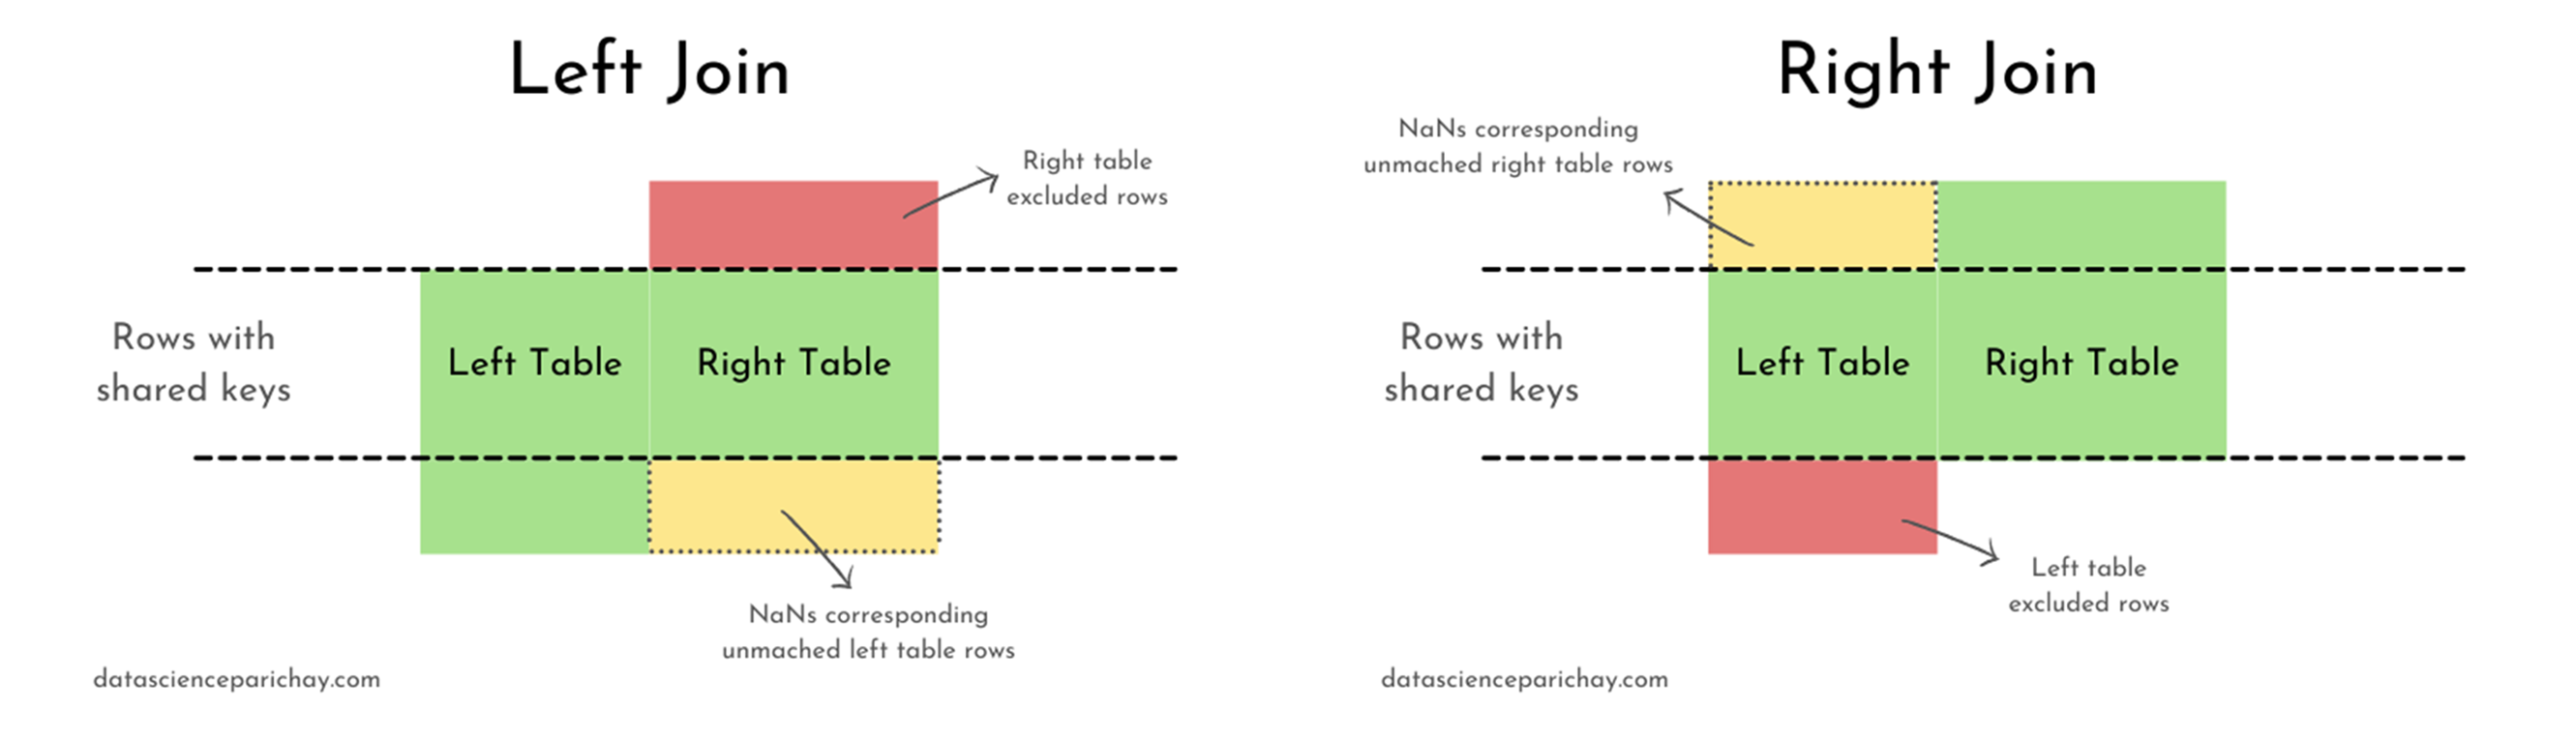

## Left Join
- 관련 문서 : https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra
- `merge()`메소드를 이용
- 두 개의 DataFrame을 Left, Right로 둘 때 Left를 기준으로 조인하는(합치는) 방법
- 결과
    - 왼쪽 DataFrame의 모든 행이 결과에 포함
    - 오른쪽 DataFrame과 일치하는 행이 없는 경우에는 결측치로 처리
- Right Join은 왼쪽 DataFrame의 역할이 반대

## Left/Right Join 공식문서 예제

In [1]:
import pandas as pd

In [2]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [3]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [4]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [5]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [8]:
# left join
pd.merge(left, right, how="left", on=["key1", "key2"], indicator=True)

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only


In [9]:
# right join
pd.merge(left, right, how="right", on=["key1", "key2"], indicator=True)

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K1,K0,A2,B2,C1,D1,both
2,K1,K0,A2,B2,C2,D2,both
3,K2,K0,NaN,NaN,C3,D3,right_only


## Inner/Right Join 본 실습
- [모의투자A.csv](https://docs.google.com/spreadsheets/d/1VvM5stKGM-wqbnFLL6IBJ3ISsoiHQE1dgvdi_24wBcs/edit?usp=sharing)
- [모의투자B.csv](https://docs.google.com/spreadsheets/d/1QzOT3z9L2yruo4wIlfKR_CVmpEW9324YyPNB_35w3BM/edit?usp=sharing)
- [모의투자B1.csv](https://docs.google.com/spreadsheets/d/1ZbaJy0XhY7jzRRYbU-iO9Y60T_pHFlOsW8Y5r9d0MgY/edit?usp=sharing)
    - 모의투자B.csv와 값은 같은데, 열 이름이 '참가ID' -> '참가번호', '참가자'-> '이름'

In [10]:
import pandas as pd

In [11]:
cols = ['참가ID', '참가자', '성별', '투자이익']

In [12]:
left = pd.read_csv('모의투자A.csv', usecols=cols)
right = pd.read_csv('모의투자B.csv', usecols=cols)

In [13]:
left

,참가ID,참가자,성별,투자이익
0,A104798,스펜서,남,50000
1,A204795,김멍멍,여,60000
2,A375562,박냐옹,남,55000
3,A408833,홍꿀꿀,여,70000
4,A523451,감꽥꽦,남,48000
5,A623415,이냐옹,여,-53000
6,A742034,강음매,남,-62000


In [14]:
right

,참가ID,참가자,성별,투자이익
0,A104798,스펜서,남,-70000
1,A204795,김멍멍,여,30000
2,A368342,한까악,남,30000
3,A408833,홍꿀꿀,여,70000
4,A542890,나구구,남,20000
5,A617483,장윙윙,남,10000
6,A732104,류어흥,여,35000
7,A910752,문부엉,남,-40000
8,A963547,마개굴,남,-15000


In [15]:
# left join -> left 0~6행
pd.merge(left, right, on=['참가ID', '참가자', '성별'], how='left', indicator=True)

,참가ID,참가자,성별,투자이익_x,투자이익_y,_merge
0,A104798,스펜서,남,50000,-70000.0,both
1,A204795,김멍멍,여,60000,30000.0,both
2,A375562,박냐옹,남,55000,NaN,left_only
3,A408833,홍꿀꿀,여,70000,70000.0,both
4,A523451,감꽥꽦,남,48000,NaN,left_only
5,A623415,이냐옹,여,-53000,NaN,left_only
6,A742034,강음매,남,-62000,NaN,left_only


In [16]:
# right join-> right 0~8행
pd.merge(left, right, on=['참가ID', '참가자', '성별'], how='right', indicator=True)

,참가ID,참가자,성별,투자이익_x,투자이익_y,_merge
0,A104798,스펜서,남,50000.0,-70000,both
1,A204795,김멍멍,여,60000.0,30000,both
2,A368342,한까악,남,NaN,30000,right_only
3,A408833,홍꿀꿀,여,70000.0,70000,both
4,A542890,나구구,남,NaN,20000,right_only
5,A617483,장윙윙,남,NaN,10000,right_only
6,A732104,류어흥,여,NaN,35000,right_only
7,A910752,문부엉,남,NaN,-40000,right_only
8,A963547,마개굴,남,NaN,-15000,right_only


## Left/Right Join is Null
- Left 또는 Right에만 있는 데이터의 Join결과 남기기

- 출처 : https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins
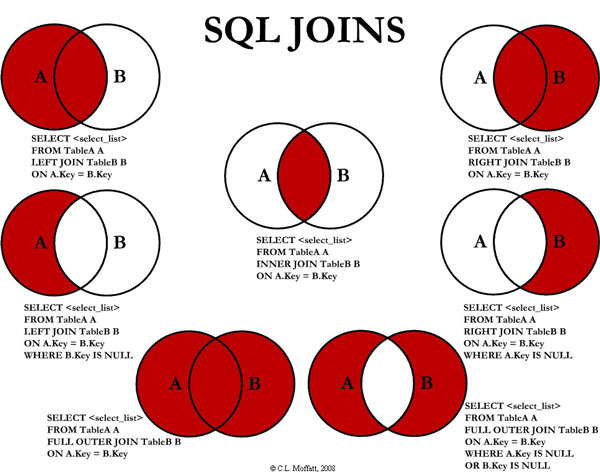

In [18]:
# pandas에서 left join is null 구현하려면
result = pd.merge(left, right, on=['참가ID', '참가자', '성별'], how='left', indicator=True)
is_null_mask = result['_merge'] == 'left_only'

In [19]:
result[is_null_mask]

,참가ID,참가자,성별,투자이익_x,투자이익_y,_merge
2,A375562,박냐옹,남,55000,NaN,left_only
4,A523451,감꽥꽦,남,48000,NaN,left_only
5,A623415,이냐옹,여,-53000,NaN,left_only
6,A742034,강음매,남,-62000,NaN,left_only


In [22]:
# pandas에서 right join is null 구현하려면
result = pd.merge(left, right, on=['참가ID', '참가자', '성별'], how='right', indicator=True)
is_null_mask = result['_merge'] == 'right_only'

In [23]:
result[is_null_mask]

,참가ID,참가자,성별,투자이익_x,투자이익_y,_merge
2,A368342,한까악,남,NaN,30000,right_only
4,A542890,나구구,남,NaN,20000,right_only
5,A617483,장윙윙,남,NaN,10000,right_only
6,A732104,류어흥,여,NaN,35000,right_only
7,A910752,문부엉,남,NaN,-40000,right_only
8,A963547,마개굴,남,NaN,-15000,right_only


## Left/Right Join is Null는 어떤 상황에서 쓸까?
- 특정 정보가 없는 사람 찾기
- 위에서 
    - Left Join is Null 같은 경우는 모의투자A는 참여했으나 모의투자B는 참가하지 않은 명단
    - Right Join is Null 같은 경우는 모의투자B는 참여했으나 모의투자A는 참가하지 않은 명단

In [24]:
# 고객 정보 DataFrame (left_df)
left1 = pd.DataFrame({'고객ID': [1, 2, 3, 4],
                      '이름': ['Son', 'Bill', 'Eric', 'Mark'],
                      '나이': [25, 33, 36, 40]})

In [25]:
# 구독 정보 DataFrame (right_df)
right1 = pd.DataFrame({'고객ID': [1, 3],
                       '구독 시작일': ['2022-01-01', '2022-03-01'],
                       '구독 종료일': ['2023-01-01', '2023-03-01'],
                       '구독 상태': ['활성', '활성']})

In [26]:
# 구독안한 고객 정보 찾기
result = pd.merge(left1, right1, on='고객ID', how='left', indicator=True)
no_subscribe = result[result['_merge'] == 'left_only']

In [27]:
no_subscribe

,고객ID,이름,나이,구독 시작일,구독 종료일,구독 상태,_merge
1,2,Bill,33,NaN,NaN,NaN,left_only
3,4,Mark,40,NaN,NaN,NaN,left_only
